# DATA ANALYTICS OF THYROID DISEASE
# Trend Analysis (5)
# Exploratory Data Analysis (6)
# Correlation Analysis (3)
# Prediction Analysis (1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway

In [5]:
thy = pd.read_csv('C:\\Users\salig\Downloads\Thyroid_Diff.csv')

In [6]:
thy

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [7]:
thy.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

# 1. What is the most common Type of Thyroid Function?

In [9]:
most_common_thy_type = thy['Thyroid Function'].value_counts().idxmax()
print(f"The most common Thyroid Function is {most_common_thy_type}")

The most common Thyroid Function is Euthyroid


# 2. How does the distribution of Physical Examination vary in diff age?

In [10]:
thy_type_by_age = thy.groupby('Age')['Physical Examination'].value_counts().unstack().fillna(0)
print(thy_type_by_age)

Physical Examination  Diffuse goiter  Multinodular goiter  Normal  \
Age                                                                 
15                               0.0                  0.0     1.0   
17                               0.0                  1.0     0.0   
18                               0.0                  0.0     0.0   
19                               0.0                  1.0     0.0   
20                               0.0                  2.0     0.0   
..                               ...                  ...     ...   
78                               0.0                  1.0     0.0   
79                               0.0                  1.0     0.0   
80                               0.0                  1.0     0.0   
81                               0.0                  2.0     0.0   
82                               0.0                  0.0     0.0   

Physical Examination  Single nodular goiter-left  Single nodular goiter-right  
Age                   

# 3. Is there a significant Pathology occurrence between males and females?

In [11]:
gender_with_most_thy = thy['Gender'].value_counts().idxmax()
print(f"The gender with the highest number of Pathology is {gender_with_most_thy}")

The gender with the highest number of Pathology is F


# 4. How does Age affect the prevalence of different thyroid diseases?

In [13]:
avg_thyroid_function_by_age = thy.groupby('Thyroid Function')['Age'].mean()
print(avg_thyroid_function_by_age)

Thyroid Function
Clinical Hyperthyroidism       42.200000
Clinical Hypothyroidism        38.916667
Euthyroid                      40.698795
Subclinical Hyperthyroidism    29.600000
Subclinical Hypothyroidism     48.642857
Name: Age, dtype: float64


# 5. Are there specific Response that have a higher smoker's by age compared to others?

In [16]:
avg_range_by_smoking = thy.groupby('Response')['Age'].mean().sort_values(ascending=False)
print(avg_range_by_smoking)

Response
Biochemical Incomplete    46.869565
Structural Incomplete     46.241758
Indeterminate             42.803279
Excellent                 37.283654
Name: Age, dtype: float64


# 6. What age mostly have with a Thyroid Disease?

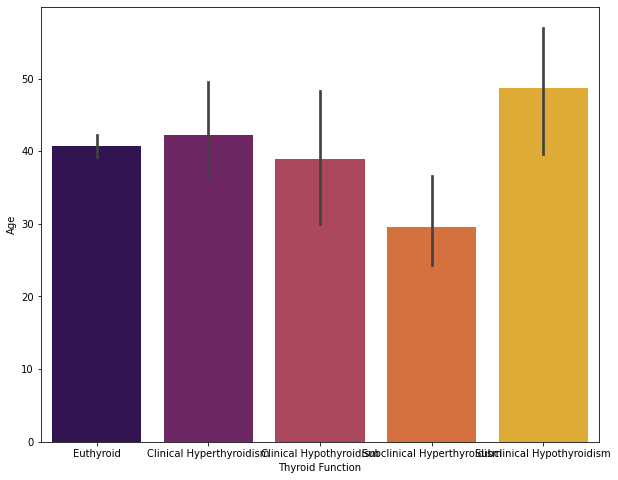

In [85]:
visual = sns.barplot(data=thy, x = "Thyroid Function", y = "Age", palette="inferno")
plt.gcf().set_size_inches(10 ,8)
plt.show()

# TREND ANALYSIS

# 7. Most Common Physical Examination Over Time?

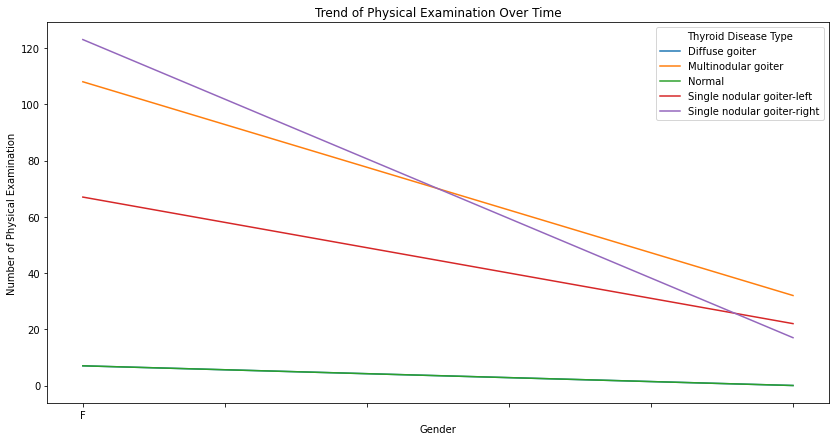

In [20]:
thy_type_trend = thy.groupby(['Gender', 'Physical Examination']).size().unstack().fillna(0)
thy_type_trend.plot(kind='line', figsize=(14, 7))
plt.title('Trend of Physical Examination Over Time')
plt.xlabel('Gender')
plt.ylabel('Number of Physical Examination')
plt.legend(title='Thyroid Disease Type')
plt.show()

# 8. Top 5 Thyroid Function with the Highest Number of Stages Over Time? 

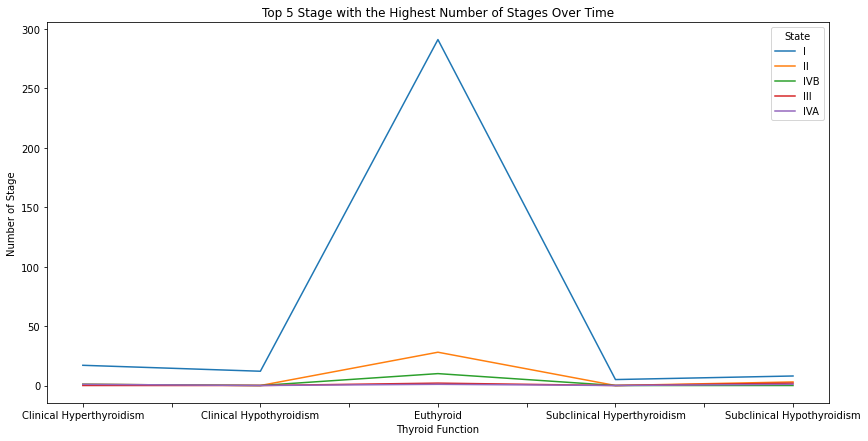

In [22]:
top_5_stage_trend = thy.groupby(['Thyroid Function', 'Stage']).size().unstack().fillna(0)
top_5_stage = top_5_stage_trend.sum().sort_values(ascending=False).head(5).index
top_5_stage_trend[top_5_stage].plot(kind='line', figsize=(14, 7))
plt.title('Top 5 Stage with the Highest Number of Stages Over Time')
plt.xlabel('Thyroid Function')
plt.ylabel('Number of Stage')
plt.legend(title='State')
plt.show()

# 9. Prevalence of Thyroid Function in Specific Stage or having this habit of smoking Over Time?

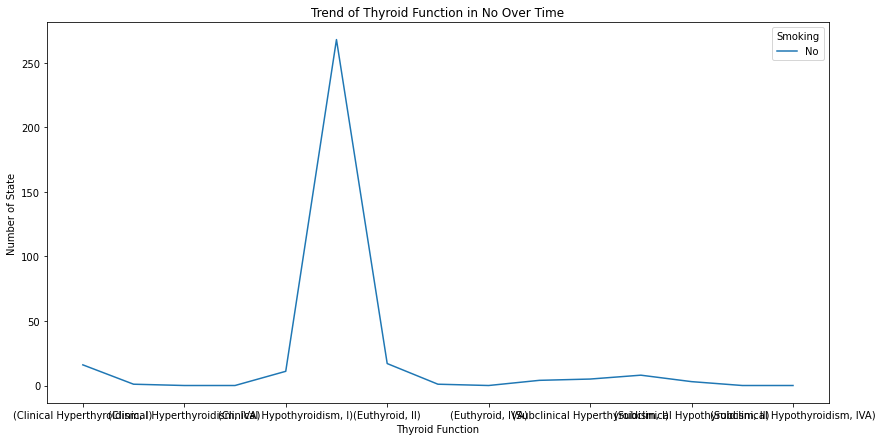

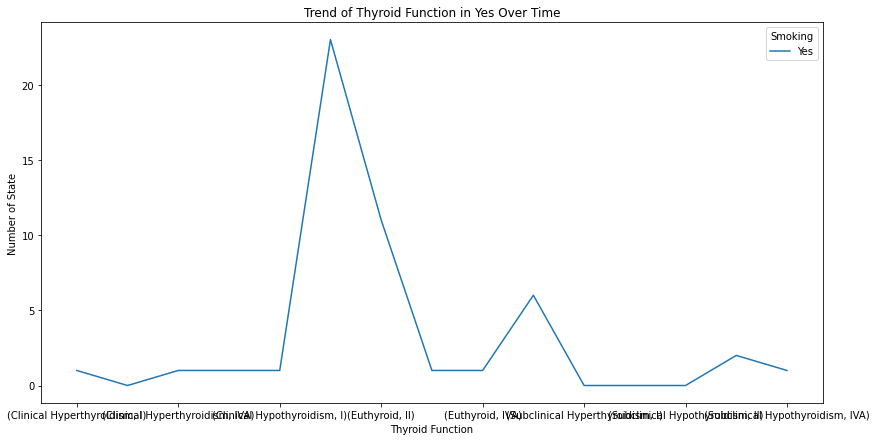

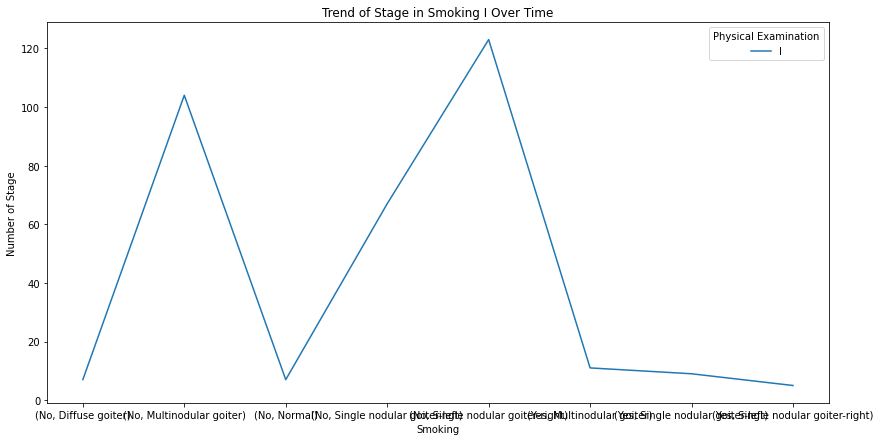

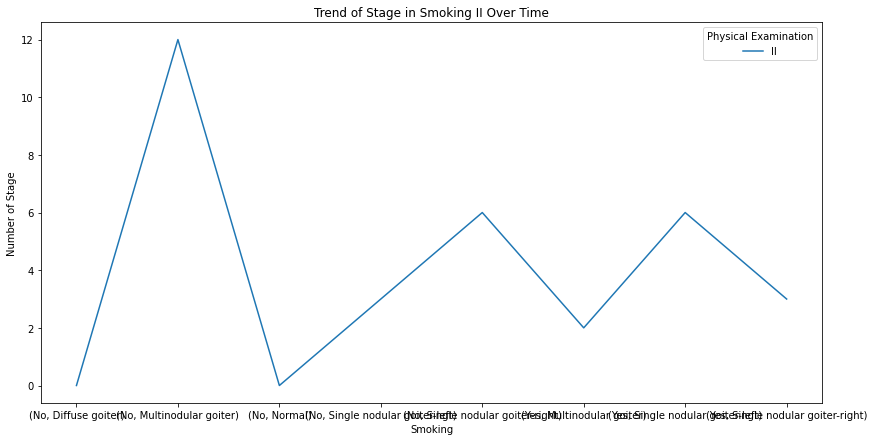

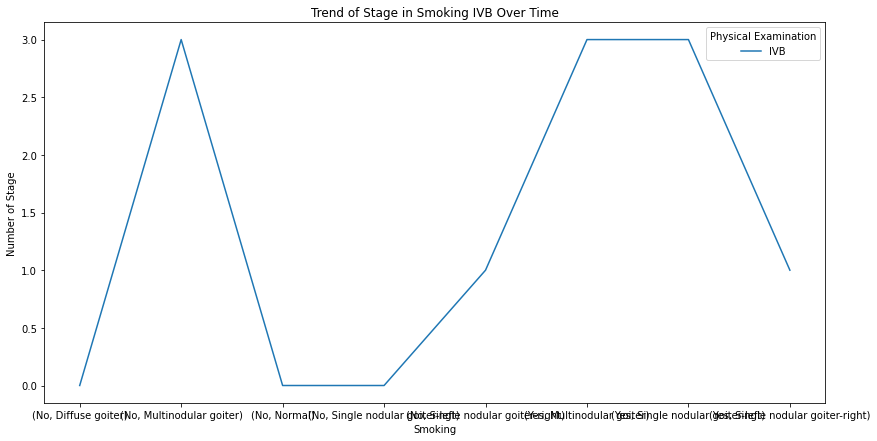

In [32]:
gender_by_stage_trend = thy.groupby(['Thyroid Function', 'Stage', 'Smoking']).size().unstack().fillna(0)
top_stage = gender_by_stage_trend.sum().sort_values(ascending=False).head(3).index
for stage in top_stage:
    gender_by_stage_trend[stage].plot(kind='line', figsize=(14, 7))
    plt.title(f'Trend of Thyroid Function in {stage} Over Time')
    plt.xlabel('Thyroid Function')
    plt.ylabel('Number of State')
    plt.legend(title='Smoking')
    plt.show()

gender_by_smoking_trend = thy.groupby(['Smoking', 'Physical Examination', 'Stage']).size().unstack().fillna(0)
top_smoking = gender_by_smoking_trend.sum().sort_values(ascending=False).head(3).index
for smoking in top_smoking:
    gender_by_smoking_trend[smoking].plot(kind='line', figsize=(14, 7))
    plt.title(f'Trend of Stage in Smoking {smoking} Over Time')
    plt.xlabel('Smoking')
    plt.ylabel('Number of Stage')
    plt.legend(title='Physical Examination')
    plt.show()

# 10. Distribution of Response in Top 3 Hx Radiothreapy Over Time? 

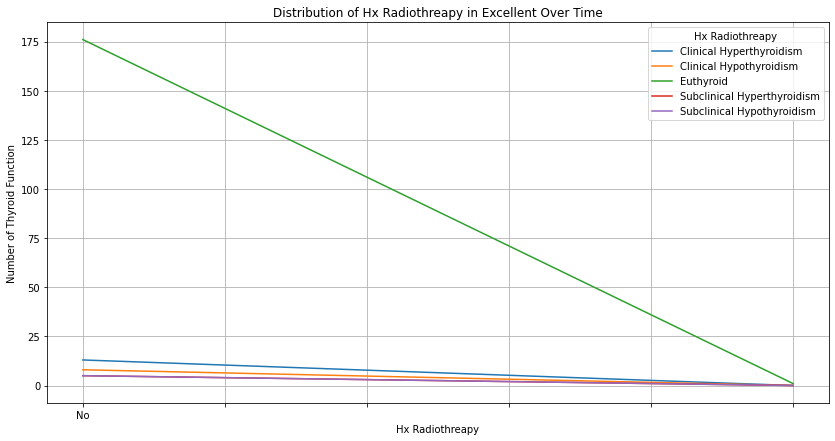

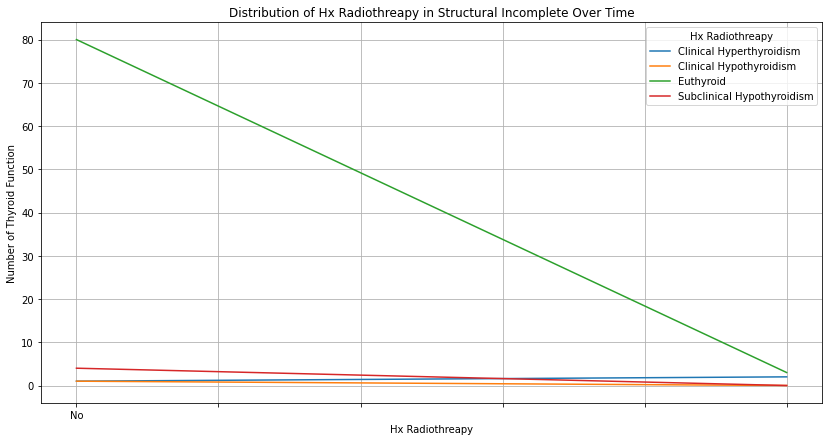

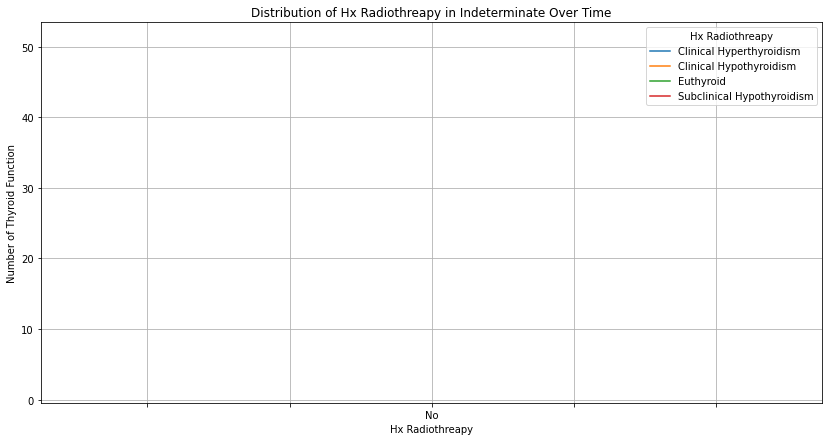

In [33]:
top_3_response = thy['Response'].value_counts().head(3).index
for response in top_3_response:
    thy_type_distribution_top_response = thy[thy['Response'] == response].groupby(['Hx Radiothreapy', 'Thyroid Function']).size().unstack().fillna(0)
    thy_type_distribution_top_response.plot(kind='line', figsize=(14, 7))
    plt.title(f'Distribution of Hx Radiothreapy in {response} Over Time')
    plt.xlabel('Hx Radiothreapy')
    plt.ylabel('Number of Thyroid Function')
    plt.legend(title='Hx Radiothreapy')
    plt.grid(True)
    plt.show()

# 11. Distribution of Gender by Thyroid Function Over Time?

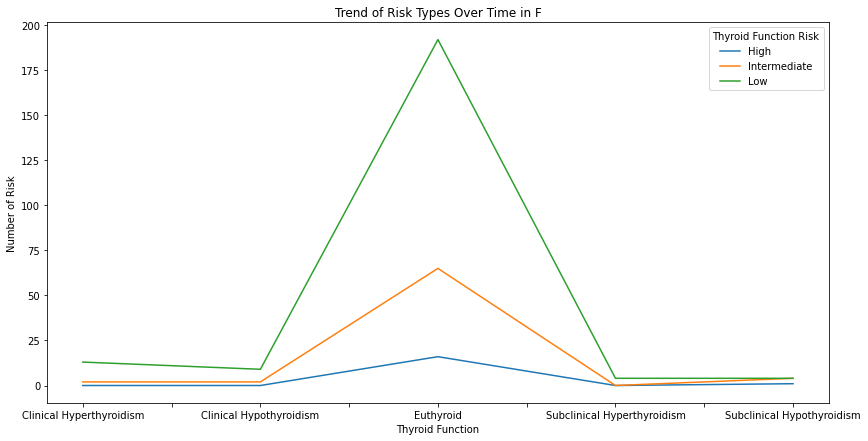

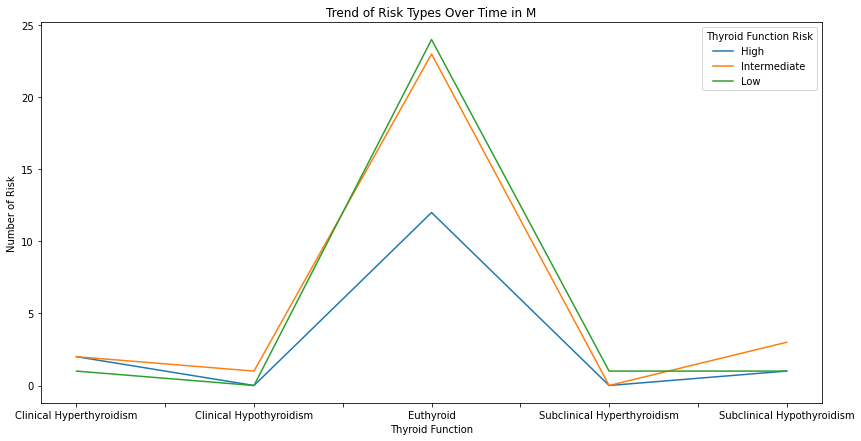

In [35]:
for gender in thy['Gender'].unique():
    gender_thy_type_trend = thy[thy['Gender'] == gender].groupby(['Thyroid Function', 'Risk']).size().unstack().fillna(0)
    gender_thy_type_trend.plot(kind='line', figsize=(14, 7))
    plt.title(f'Trend of Risk Types Over Time in {gender}')
    plt.xlabel('Thyroid Function')
    plt.ylabel('Number of Risk')
    plt.legend(title='Thyroid Function Risk')
    plt.show()

# CORRELATION ANALYSIS

# 12. Does the Adenophany is correlated with the Pathology?

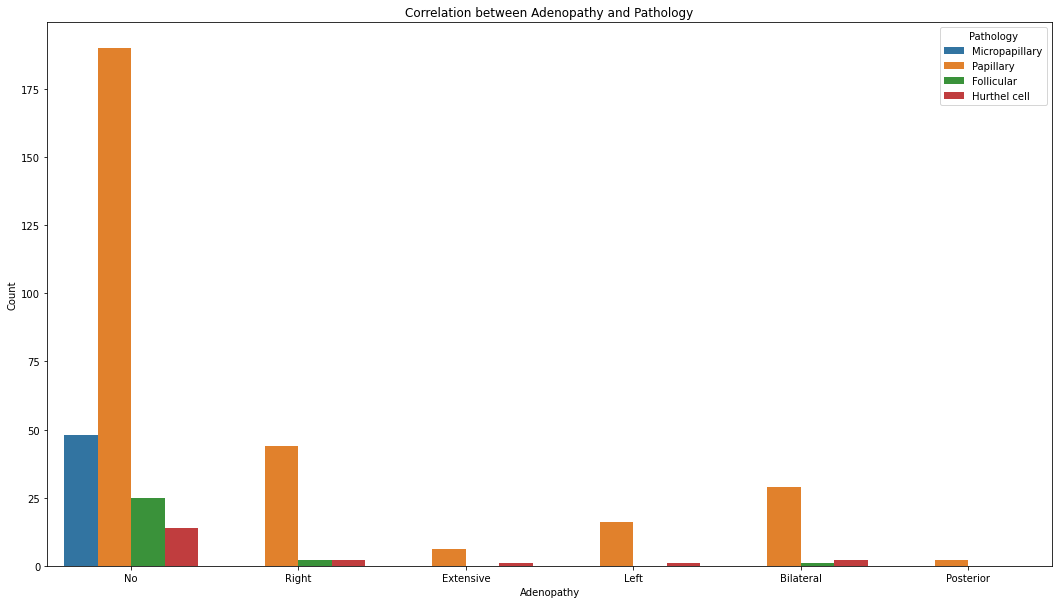

In [36]:
plt.figure(figsize=(18, 10))
sns.countplot(x='Adenopathy', hue='Pathology', data=thy)
plt.title('Correlation between Adenopathy and Pathology')
plt.xlabel('Adenopathy')
plt.ylabel('Count')
plt.legend(title='Pathology', loc='upper right')
plt.show()

# 13. Does the Risk of having Thyroid Disease is correlated with the Age?

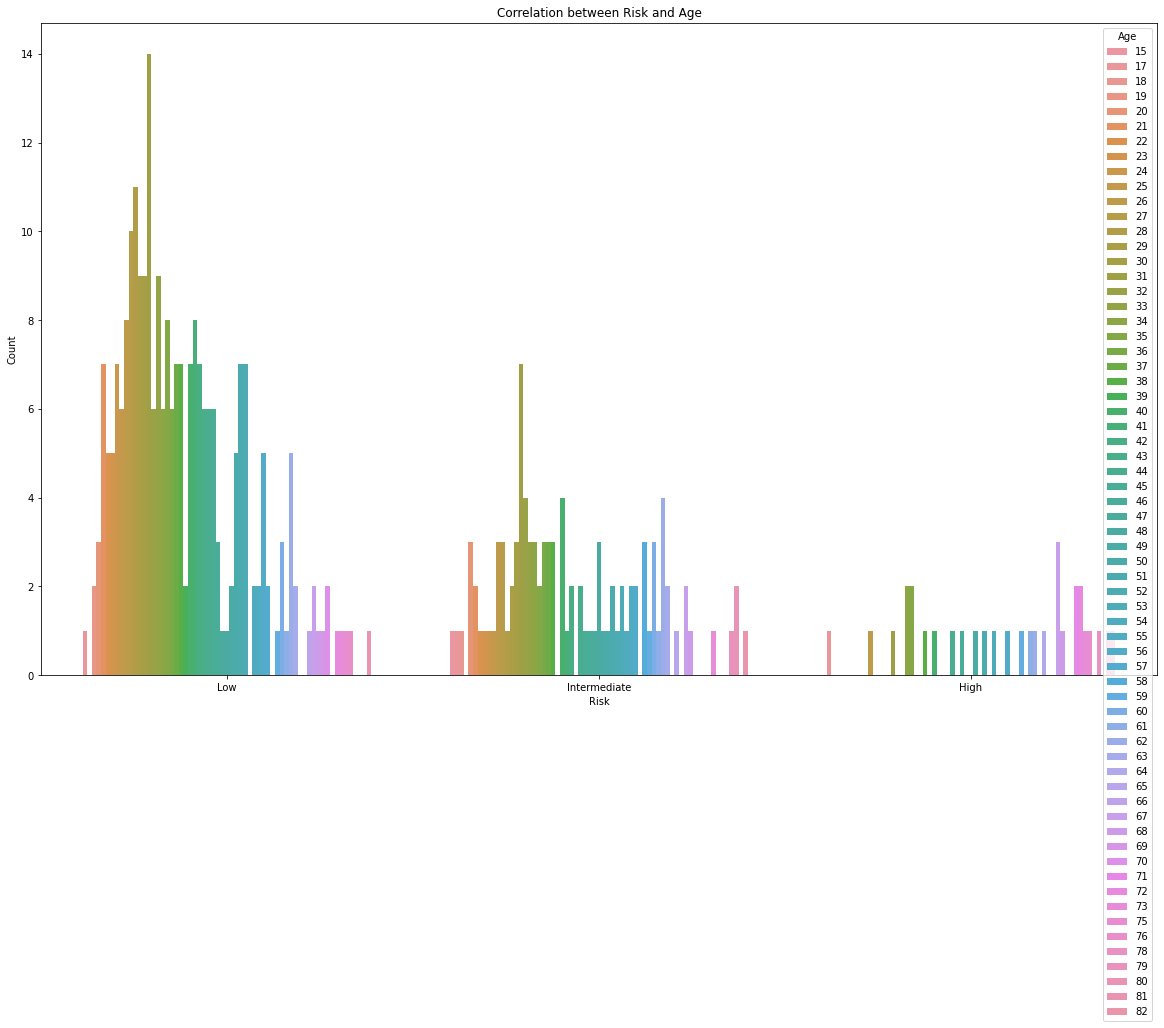

In [56]:
plt.figure(figsize=(20, 12))
sns.countplot(x='Risk', hue='Age', data=thy)
plt.title('Correlation between Risk and Age')
plt.xlabel('Risk')
plt.ylabel('Count')
plt.legend(title='Age', loc='upper right')
plt.show()

# 14. Does the Pathology is correlated with the Age?

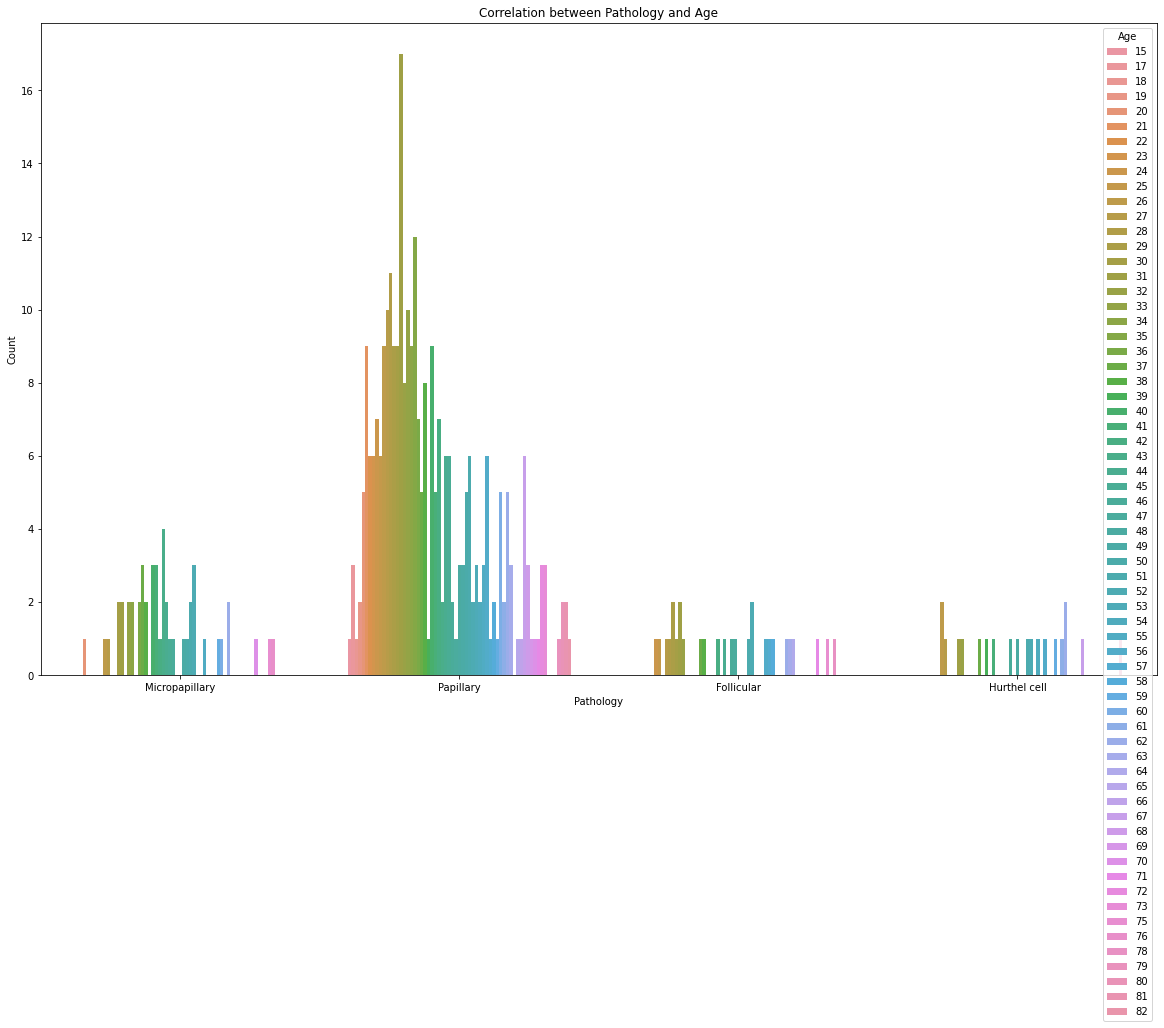

In [60]:
plt.figure(figsize=(20, 12))
sns.countplot(x='Pathology', hue='Age', data=thy)
plt.title('Correlation between Pathology and Age')
plt.xlabel('Pathology')
plt.ylabel('Count')
plt.legend(title='Age', loc='upper right')
plt.show()

# 15. In what age mostly having thyroid disease?

# PREDICTION ANALYSIS

In [65]:
thy.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [75]:
thy.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'Pathology': 'Types of Thyroid Cancer (Pathology)',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis',
                  'Response' : 'Treatment Response'}, inplace=True)

In [68]:
thy.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [70]:
thy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age                                  383 non-null    int64 
 1   Gender                               383 non-null    object
 2   Smoking                              383 non-null    object
 3   Smoking History                      383 non-null    object
 4   Radiotherapy History                 383 non-null    object
 5   Thyroid Function                     383 non-null    object
 6   Physical Examination                 383 non-null    object
 7   Adenopathy                           383 non-null    object
 8   Types of Thyroid Cancer (Pathology)  383 non-null    object
 9   Focality                             383 non-null    object
 10  Risk                                 383 non-null    object
 11  Tumor                                383 non-

In [78]:
thy.isnull().sum()

Age                                    0
Gender                                 0
Smoking                                0
Smoking History                        0
Radiotherapy History                   0
Thyroid Function                       0
Physical Examination                   0
Adenopathy                             0
Types of Thyroid Cancer (Pathology)    0
Focality                               0
Risk                                   0
Tumor                                  0
Lymph Nodes                            0
Cancer Metastasis                      0
Stage                                  0
Treatment Response                     0
Recurred                               0
dtype: int64

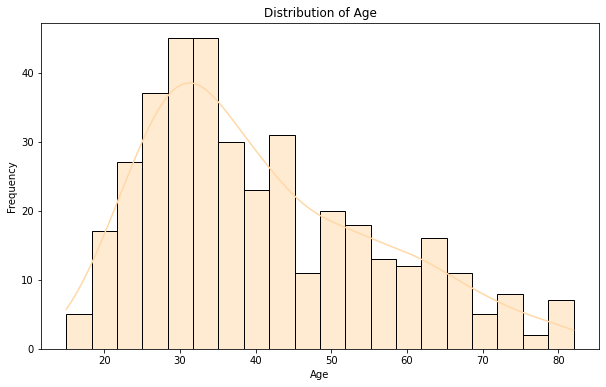

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(thy['Age'], bins=20, kde=True, color='#ffd8a7')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()